Choose an example data set, or use your own folder of VCF's.

Example sets:
- `sample_data/denmark_data_batch1`
- `sample_data/denmark_data_batch2`
- `sample_data/oceania_data`
- `sample_data/denmark_data_batch2_households`: artificially created subset of `sample_data/denmark_data_batch2_households` dataset used to produce the phylogenetic tree figures in the README.

In [1]:
vcf_directory = 'sample_data/denmark_data_batch1'
mask_file = "sample_data/default_mask.txt"

<div> Run this block, this imports the neccessary functions. </div>

In [2]:
import os
import random

#from trakit import *
from trakit.bbAnalysis import *
from trakit.genomeGen import *
from trakit.PhyloTree import *
from trakit.visualization import *
from trakit.vcfParsing import *

<div> Chooses two random vcfs from the data set to use in examples. If you aren't happy with the vcfs chosen, run this block again to choose new ones. </div>

In [3]:
vcfs = os.listdir(vcf_directory)
notSelected = True
while notSelected:
    randomNum1 = random.randrange(len(vcfs))
    randomNum2 = random.randrange(len(vcfs))
    if randomNum1 != randomNum2 and vcfs[randomNum1].endswith(".vcf") and vcfs[randomNum2].endswith(".vcf"):
        file1 = vcfs[randomNum1]
        file2 = vcfs[randomNum2]
        notSelected = False
file1 = os.path.join(vcf_directory, file1)
file2 = os.path.join(vcf_directory, file2)

# <div align="center"> Bottleneck Analysis </div>

Create input file for and runs the [BB Bottleneck Estimator](https://github.com/weissmanlab/BB_bottleneck) R script, producing "approx_plot.jpg" in the same folder as this notebook.

In [4]:
filename = str(write_bb_bottleneck_input_file(file1, file2, masks=mask_file, min_AF=.02, max_AF=(.5,.99)))
plot_bool = True # if pdf plot is produced
var_calling_threshold = 0.03 # variant calling threshold
nb_min = 1 # minimum bottleneck size
nb_max = 200 # maximum bottleneck size
confidence_level = .95

cmnd = f"Rscript trakit/scripts/Bottleneck_size_estimation_approx.r --file {filename} --var_calling_threshold {var_calling_threshold} --Nb_min {nb_min} --Nb_max {nb_max} --confidence_level {confidence_level}"
# --plot_bool FALSE does not actually work.
if plot_bool:
    cmnd += f" --plot_bool TRUE"
print(cmnd)
!{cmnd}

Rscript trakit/scripts/Bottleneck_size_estimation_approx.r --file new_ERR4147022_ERR4145431_thred0_complete_nofilter_bbn.txt --var_calling_threshold 0.03 --Nb_min 1 --Nb_max 200 --confidence_level 0.95 --plot_bool TRUE
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.1
✔ readr   2.1.2     ✔ forcats 0.5.2
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
Warning messages:
1: package ‘tidyverse’ was built under R version 4.2.1 
2: package ‘ggplot2’ was built under R version 4.2.1 
3: package ‘stringr’ was built under R version 4.2.1 
4: package ‘forcats’ was built under R version 4.2.1 
[1] "WARNING:  Rows of the input file with donor frequency less than variant calling threshold have been removed during analysis. "
Saving 7 x 7 in image
[1] "Bot

### Bottleneck Size Plot (All Pairs)
Plot bottleneck size of all pairs of samples whose number of shared iSNVs (minor variants) exceed a certain threshold (as defined by `min_shared`).

This could take a while, so **don't run this unless you want to analyze all possible pairs of samples in a dataset**.

In [ ]:
# plot_bottleneck_all_pairs('sample_data/malta_data', 
#     min_read_depth=0, 
#     min_AF=.02,
#     max_AF=(0.5, .99), 
#     min_shared=10,
#     save=False, 
#     output_folder=None,
#     verbose=False,
#     masks=mask_file
# )

### Bottleneck Size Plot (Clusters)
Plot the bottleneck size in clusters. The clusters are defined by the user in a TSV file which is the second parameter of this function.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


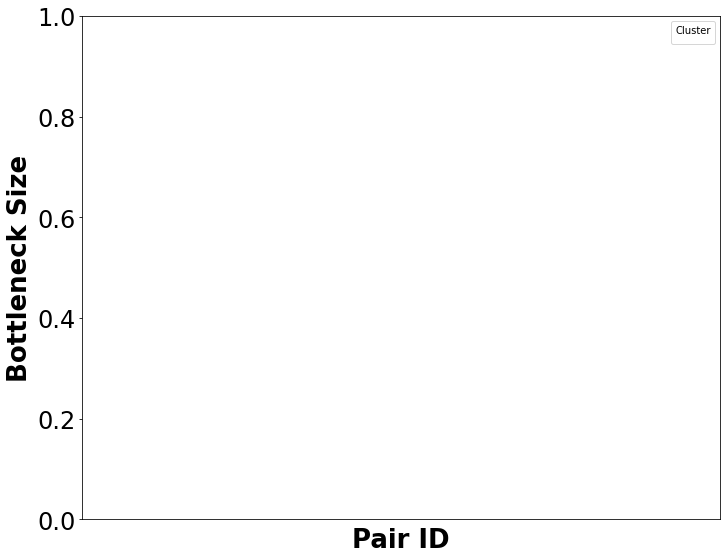

[set()]

In [5]:
plot_bottleneck_in_clusters('sample_data/denmark_data_batch2_households',
    'sample_data/denmark_data_batch2_households/transmission_clusters_sample.tsv',
    min_read_depth=10,
    min_AF=.02,
    max_AF=(0.5, .99),
    min_shared=10,
    save=False,
    output_folder=None,
    verbose=False,
    masks=mask_file,
    legend_loc="upper right"
)

# <div align="center">Shared Variant Analysis</div>


### Allele Frequency Bar Plots 
Plot the weighted and unweighted allele frequency bar plots for a pair of samples. The weighted bar plot is weighted by the read depths of all alleles represented.

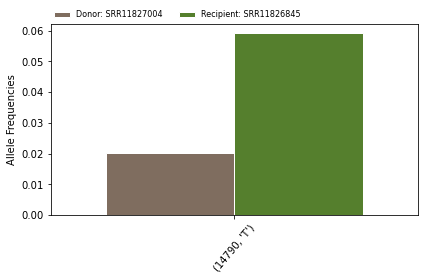

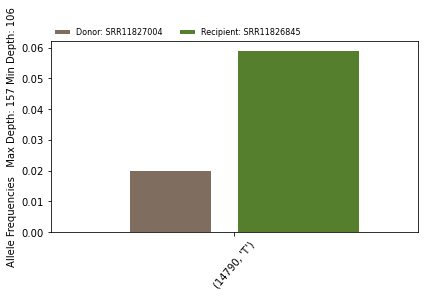

In [8]:
plot_allele_frequencies(
    file1,
    file2,
    min_read_depth=10,
    min_AF=.02,
    max_AF=(.5, .99), # recipient max AF will always be 1
    save=True, 
    output_folder=vcf_directory,
    masks=mask_file
)

plot_allele_frequencies(
    file1, 
    file2, 
    plot_type='weighted',
    min_read_depth=10,
    min_AF=.02,
    max_AF=(.5, .99),
    save=True, 
    output_folder=vcf_directory,
    masks=mask_file
)

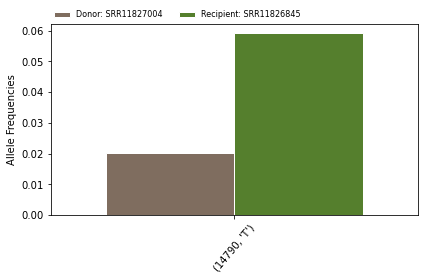

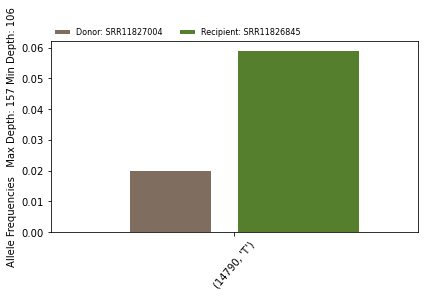

In [7]:
file1="sample_data/oceania_data/SRR11827004.vcf"
file2="sample_data/oceania_data/SRR11826845.vcf"
plot_allele_frequencies(
    file1,
    file2,
    min_read_depth=10,
    min_AF=.02,
    max_AF=(.5, .99), # recipient max AF will always be 1
    save=True, 
    output_folder=vcf_directory,
    masks=mask_file
)

plot_allele_frequencies(
    file1, 
    file2, 
    plot_type='weighted',
    min_read_depth=10,
    min_AF=.02,
    max_AF=(.5, .99),
    save=True, 
    output_folder=vcf_directory,
    masks=mask_file
)

### All Allele Frequency Bar Plots 
Plots all allele frequency bar plots for a given data set. 
- `plot_type`: specifies whether the plots should be `unweighted` or `weighted` by read depth. 
- `save`: if this parameter is set to `true`, a new directory with all possible bar plots will be created. If the `output_folder` parameter is not specified, the directory will be created in the same directory containing the VCFs.

This could take a while, so **don't run this unless you want to analyze all possible pairs of samples in a dataset**.

In [ ]:
# plot_allele_frequencies_all_pairs(
#     vcf_directory, 
#     plot_type='unweighted', 
#     min_read_depth=10,
#     min_AF=.02,
#     max_AF=(.5, .99),
#     save=False,
#     masks=mask_file)

In [ ]:
vcf_directory = "sample_data/oceania_data"
plot_allele_frequencies_all_pairs(
    vcf_directory, 
    plot_type='weighted', 
    min_AF=.02,
    max_AF=(.5, .99),
    save=False
)

### Number of Shared Variants Plot
Plots a bar plot showing the number of shared variants between sample pairs. Potentially erroneous sites can be masked if the `masks` parameter is set to the path of a mask file.

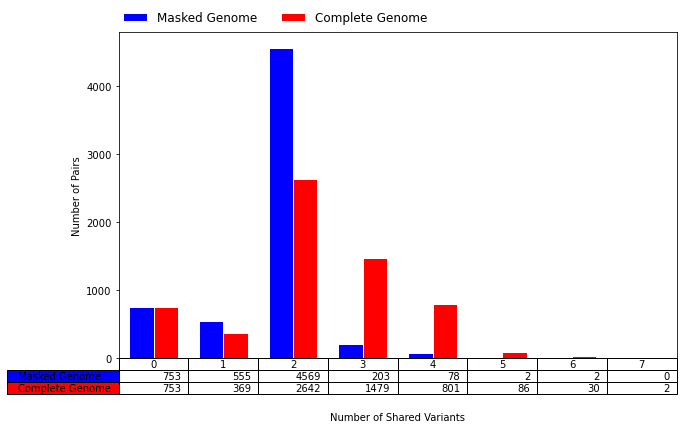

In [9]:
masked_transm_pairs = extract_shared_variants_all_pairs(
    vcf_directory, 
    masks=mask_file, 
    min_AF=.02,
    max_AF=(.5,1), 
    min_read_depth=10
)
complete_transm_pairs = extract_shared_variants_all_pairs(
    vcf_directory, 
    min_AF=.02,
    max_AF=(.5,1), 
    min_read_depth=10
)

# Visualizes the number of shared variants when the genome is both complete and masked.
plot_shared_variant_counts(
    complete_transm_pairs, 
    mask_pairs_list=masked_transm_pairs, 
    high_shared=6,
    save=True, 
    output_folder=vcf_directory
)

### Top Shared Variant Positions Plot
Plots a bar plot showing the number of sample pairs that share variants at certain positions.

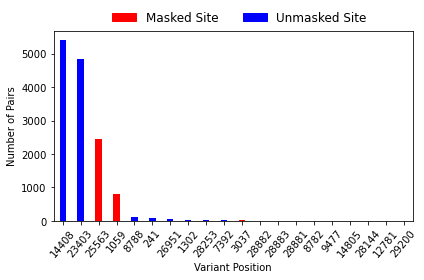

In [10]:
# Visualizes top 20 positions that have the most pairs with a variant at that position
plot_top_shared_variant_sites(
    complete_transm_pairs, 
    mask_file, 
    vcf_directory, 
    save=True, 
    output_folder=None, 
    shown_variants=20
)

# <div align="center">Phylogenetic Analysis</div>

In [4]:
# FASTA file of the reference genome.
#reference_fasta = "sample_data/MN908947-ref.fasta"
reference_fasta = "sample_data/SARS-CoV-2-ref.fasta"

# Relative/Absolute Path to directory containing VCF files.
vcf_directory = "sample_data/denmark_data_batch2_households"
#  "sample_data/oceania_data"

# Relative/Absolute path to a TSV file containing sample metadata.
#metadata_path = None
metadata_path = "sample_data/denmark_data_batch2_households/transmission_clusters_sample.tsv"
# metadata_path = "sample_data/spain_data/transmission_clusters.tsv"
# metadata_path = "sample_data/denmark_data_batch2_subset/transmission_clusters_all.tsv"
has_column_names = True

# Relative/Absolute path to the output directory in which results will be placed.
output_directory = "TransmissionViz_denmark_data_4"

## Create and align FASTA files to the reference

You must run this cell before the subsequent ones!

In [5]:
tree = PhyloTree(
    output_directory, 
    reference_fasta, 
    vcf_directory, 
    metadata_path=metadata_path, 
    has_column_names=has_column_names)

# Using the reference and VCF files, construct the consensus sequence and iSNV embedded sequence of each sample
consensus_fasta_folder = tree.create_consensus_sequences()
isnv_fasta_folder = tree.create_isnv_embedded_sequences(min_AF=.1)

# Use RAxML to infer the phylogeny of the samples and make a tree file 
raxml_newick, refname = tree.infer_phylogeny(
    consensus_fasta_folder, 
    os.path.join(output_directory, "consensus"),
    threads=1
)
raxml_newick_isnv, refname = tree.infer_phylogeny(
    isnv_fasta_folder, 
    os.path.join(output_directory, "isnv"),
    threads=1
)

## Phylogenetic tree visualization
Using the tree file generated by RAxML, visualize the phylogeny of the consensus sequences

In [6]:
rtre = tree.construct_tree(tree_path=raxml_newick, root_wildcard=refname)
tree.plot_tree(rtre, render_type="html", width=500, height=800)

Tree visualization has been saved to TransmissionViz_denmark_data_4/phylogenetic_tree.html.


## Phylogenetic tree + SNP heat map visualization
Makes a heat map that shows where a sample's consensus sequence differs from the reference.

In [7]:
tree.plot_snp_heatmap(
    rtre, 
    min_AF=.05,
    render_type="html", 
    width=500, 
    height=800,
    legend_bounds=(10, 90, 550, 700),
    metadata_path=metadata_path,
    column_name="Transmission cluster"
)

Tree + SNP heatmap visualization has been saved to TransmissionViz_denmark_data_4/consensus/snp_heatmap.html.


## Phylogenetic tree + iSNV heat map visualization
Using the tree file generated by RAxML, visualize the phylogeny of the iSNV sequences, alongside a heat map that shows the frequency of minor variants in samples.

In [8]:
rtre2 = tree.construct_tree(tree_path = raxml_newick_isnv, root_wildcard=refname)
tree.plot_isnv_heatmap(
    rtre2, 
    min_AF=.05,
    show_snps=False,
    render_type="html", 
    width=600, 
    height=900,
    legend_bounds=(110, 190, 700, 790),
    metadata_path=metadata_path,
    column_name="Transmission cluster"
)

Tree + iSNV heat map visualization has been saved to TransmissionViz_denmark_data_4/isnv/isnv_heatmap.html.


## Individual iSNV Cluster visualization
Visualize the phylogeny and frequency of minor variants in samples, cluster by cluster. If no metadata was provided to this PhyloTree instance, samples will be grouped based on whether they share identical iSNV-embedded sequences.

In [6]:
# Run RAxML on each iSNV cluster.
cluster_folder_path = tree.align_isnv_clusters(threads=1)

# Visualize the clusters.
tree.plot_isnv_clusters(
    cluster_folder_path, 
    min_AF=.02, 
    render_type=None,
    show_legend=True
)

KeyboardInterrupt: 

## All visualizations

In [9]:
# plot_phylotree_all("sample_data/toytree/vcfs/", "sample_data/SARS-CoV-2-ref.fasta", metadata_path="sample_data/toytree/transmission_clusters.tsv")
plot_phylotree_all(
    "sample_data/denmark_data/", 
    "sample_data/SARS-CoV-2-ref.fasta", 
    output_dir="TransmissionViz_denmark_data",
    min_AF=0.02,
    render_type=None,
    width=500,
    height=None
)
# plot_phylotree_all("sample_data/denmarkData/", "sample_data/SARS-CoV-2-ref.fasta", output_dir="TransmissionViz_denmarkData")
# plot_phylotree_all("sample_data/oceania_data/", "sample_data/SARS-CoV-2-ref.fasta", output_dir="TransmissionViz_oceania_data")

FileNotFoundError: Directory does not exist: sample_data/denmark_data/